In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import operator as ops
from functools import *

sns.set_style('darkgrid')

In [65]:
data = pd.read_csv('../data/online_shoppers_intention.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [66]:
months = data.Month.unique().tolist()
months

['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep', 'Dec']

In [67]:
months_of_year = [
    'Feb',
    'Mar',
    'May',
    'June',
    'Jul',
    'Aug',
    'Sep',
    'Oct',
    'Nov',
    'Dec'
]

month_to_id = {month: id_ for id_, month in enumerate(months_of_year)}

In [68]:
categorical_variables = [
    'VisitorType',
    'TrafficType',
    'Region',
    'Browser',
    'OperatingSystems',
    'Weekend',
    'Revenue'

]
processed_data = data.copy()
for v in categorical_variables:
    data[v] = data[v].astype('category')
    processed_data[v] = data[v]
    processed_data[v + '_Code'] = data[v].cat.codes

add = lambda b: lambda a: ops.add(a, b)
coded_categorical_variable_names = [c + '_Code' for c in categorical_variables]
data.Month = pd.Categorical(data.Month, 
                            ordered=True, 
                            categories=months_of_year)
data['Month'] = data.Month.cat.codes
processed_data.Month = data.Month

processed_data = pd.get_dummies(processed_data, prefix_sep='=')
processed_data.drop(coded_categorical_variable_names, axis=1) \
              .to_csv('../data/processed_data.csv', index=False)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null int8
OperatingSystems           12330 non-null category
Browser                    12330 non-null category
Region                     12330 non-null category
TrafficType                12330 non-null category
VisitorType                12330 non-null category
Weekend                    12330 non-null category
Revenue                    12330 non-null ca

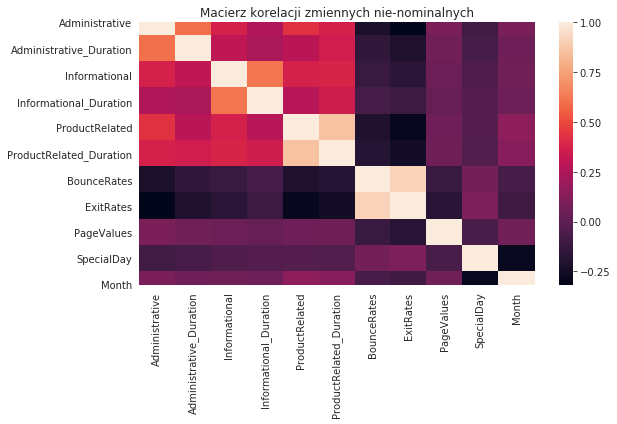

In [69]:
correlations = data.corr()
n_corr_columns = len(correlations.columns)
fig, ax = plt.subplots(figsize=(9,6))

sns.heatmap(correlations)
ax.set_title('Macierz korelacji zmiennych nie-nominalnych')
plt.tight_layout()
plt.show()

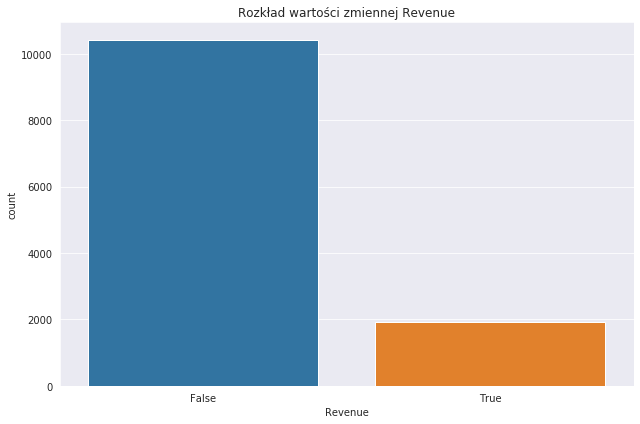

In [16]:
fig, ax = plt.subplots(figsize=(9,6))
sns.countplot(data.Revenue)
ax.set_title('Rozkład wartości zmiennej Revenue')
plt.tight_layout()
plt.show()

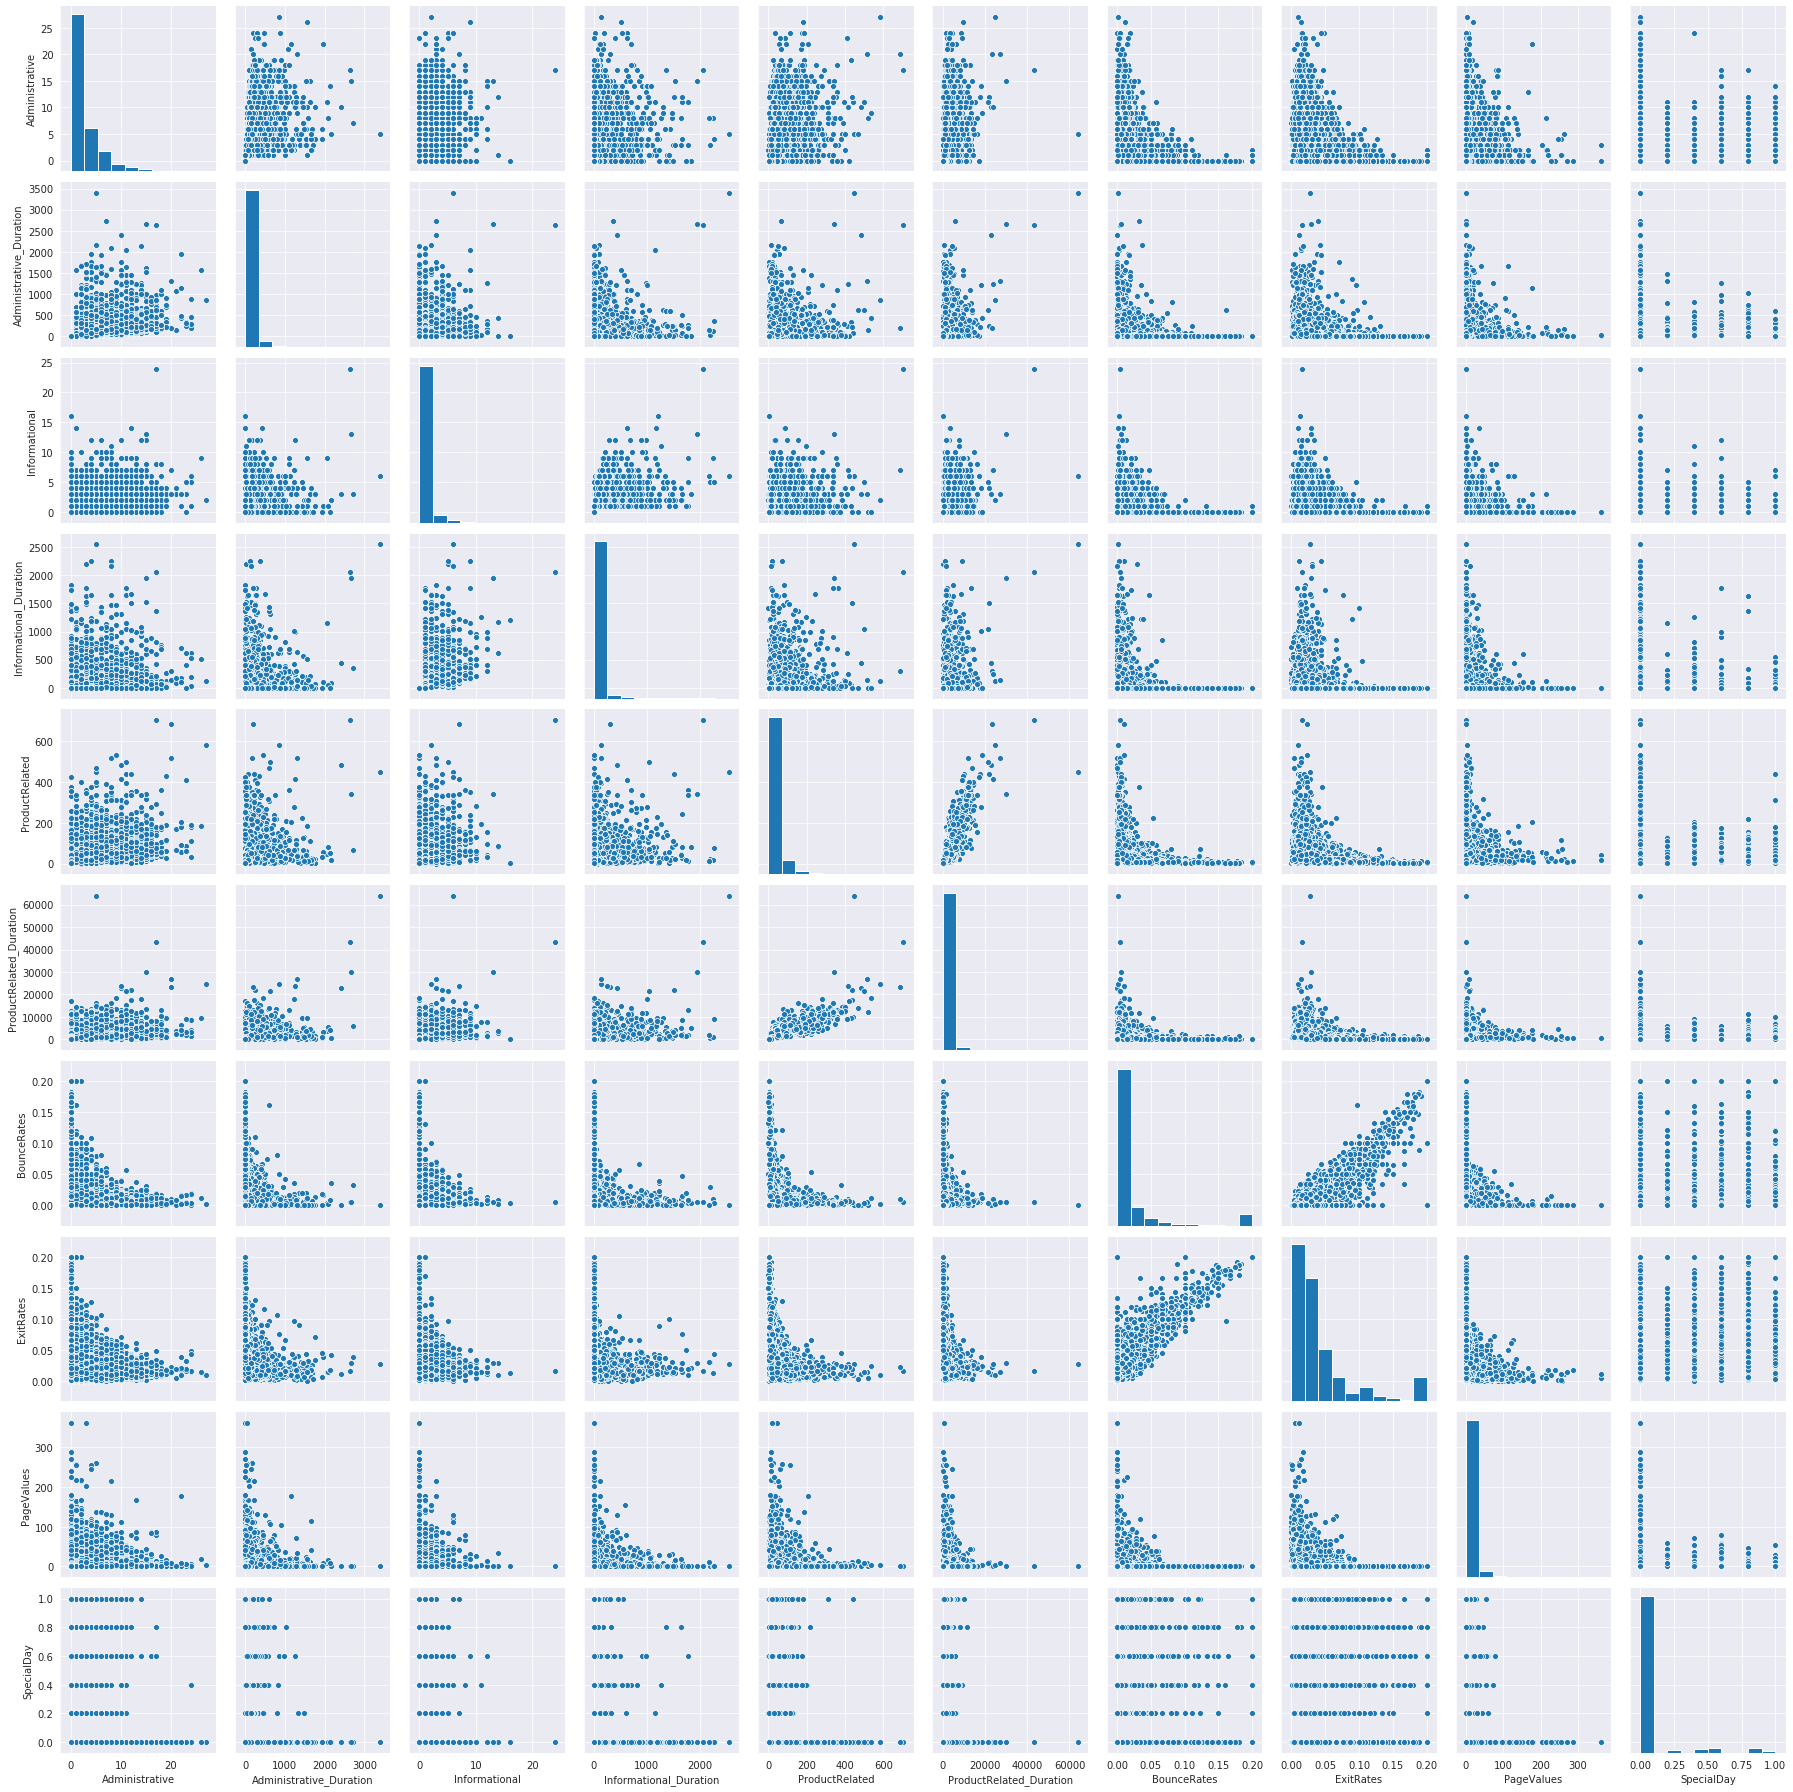

In [21]:
sns.pairplot(data.drop(categorical_variables, axis=1))
plt.tight_layout()
plt.show()